# 0. Introduction
This project trains a Long Short Term Memory (LSTM) network to detect and classify a text written in English according to a particular variant: whether it is British or American. 

## 0.1 Preliminary Libraries and Packages

In [ ]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import math
from nltk.corpus import brown
import numpy as np

# 1. Preprocess

## 1.1 Brown Corpus

In [ ]:
nltk.download('brown')
brown.words()[:10]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of']

In [ ]:
print(len(brown.words()))

1161192


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

# Added extra punctuation
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',
               ':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']

lower_brown = [x.lower() for x in brown.words()]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(lower_brown[:10])
print(len(lower_brown))

['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of']
1161192


In [ ]:
pun_stop = punctuation + stopwords.words('english')
filter_brown = [x for x in lower_brown if x not in pun_stop]

In [ ]:
print(filter_brown[:10])

['fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', "atlanta's", 'recent', 'primary']


In [ ]:
filter_brown2 = list(filter(lambda x: x.isalpha() and len(x) > 1, filter_brown)) 
# remove numbers and single letter words

In [ ]:
print(filter_brown2[:10])

['fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', 'recent', 'primary', 'election']


In [ ]:
print(len(filter_brown2))

508631


## 1.2 LOB Corpus

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/LOB"

lob.txt


In [ ]:
f = open('/content/drive/My Drive/LOB/lob.txt')
lob = f.readlines()

In [ ]:
print(lob[:100])


['<1 TEXT A1>\n', "'STOP ELECTING LIFE PEERS'\n", 'By TREVOR WILLIAMS\n', '   A MOVE to stop Mr. Gaitskell from nominating any more Labour\n', 'life Peers is to be made at a meeting of Labour M Ps tomorrow.\n', '   Mr. Michael Foot has put down a resolution on the subject and\n', 'he is to be backed by Mr. Will Griffiths, M P for Manchester\n', 'Exchange.\n', '   Though they may gather some Left-wing support, a large majority\n', 'of Labour M Ps are likely to turn down the Foot-Griffiths\n', 'resolution.\n', "'ABOLISH LORDS'\n", "   Mr. Foot's line will be that as Labour M Ps opposed the\n", 'Government Bill which brought life peers into existence, they should\n', 'not now put forward nominees.\n', '   He believes that the House of Lords should be abolished and that\n', 'Labour should not take any steps which would appear to "prop up" an\n', 'out-dated institution.\n', '   Since 1958, 13 Labour life Peers and Peeresses have been created.\n', '   Most Labour sentiment would still favour

In [ ]:
lob2 = lob.copy()

In [ ]:
lob2 = [''.join(lob2)]

In [ ]:
lob3 = str(lob2[0])

In [ ]:
lob3 = lob3.replace("<","")
lob3 = lob3.replace(">","")
lob3 = lob3.replace("\n"," ")

In [ ]:
def string_to_list(string):
    new_list = list(string.split(" "))
    return new_list


In [ ]:
lob4 = string_to_list(lob3)

In [ ]:
lob4[:10]

['1',
 'TEXT',
 'A1',
 "'STOP",
 'ELECTING',
 'LIFE',
 "PEERS'",
 'By',
 'TREVOR',
 'WILLIAMS']

In [ ]:
lower_lob = [x.lower() for x in lob4]

In [ ]:
print(lower_lob[:10])
print(len(lower_lob))

['1', 'text', 'a1', "'stop", 'electing', 'life', "peers'", 'by', 'trevor', 'williams']
1068614


In [ ]:
filter_lob = [x for x in lower_lob if x not in pun_stop]

In [ ]:
print(filter_lob[:10])

['1', 'text', 'a1', "'stop", 'electing', 'life', "peers'", 'trevor', 'williams', '']


In [ ]:
filter_lob2 = list(filter(lambda x: x.isalpha() and len(x) > 1, filter_lob)) 
# remove numbers and single letter words

In [ ]:
print(filter_lob2[:10])

['text', 'electing', 'life', 'trevor', 'williams', 'move', 'stop', 'gaitskell', 'nominating', 'labour']


In [ ]:
print(len(filter_lob2))

389754


## 1.3 Converting the Corpora to a Dataframe

In [ ]:
def create_substrings(x): # x is a list of words
  listoflists = []
  n = 0
  m = 10
  for i in range(int(len(x)/10)):
    listx = []
    for j in range(n,m):
      listx.append(x[j])
    listoflists.append(listx)
    n += 10
    m += 10
  return listoflists

In [ ]:
lob_list = create_substrings(filter_lob2)
brown_list = create_substrings(filter_brown2)

In [ ]:
len(lob_list)

38975

In [ ]:
len(brown_list)

50863

In [ ]:
print(brown_list[0:5])


[['fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', 'recent', 'primary', 'election'], ['produced', 'evidence', 'irregularities', 'took', 'place', 'jury', 'said', 'presentments', 'city', 'executive'], ['committee', 'charge', 'election', 'deserves', 'praise', 'thanks', 'city', 'atlanta', 'manner', 'election'], ['conducted', 'term', 'jury', 'charged', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye'], ['investigate', 'reports', 'possible', 'irregularities', 'primary', 'ivan', 'allen', 'relative', 'handful', 'reports']]


In [ ]:
print(lob_list[0:5])

[['text', 'electing', 'life', 'trevor', 'williams', 'move', 'stop', 'gaitskell', 'nominating', 'labour'], ['life', 'peers', 'made', 'meeting', 'labour', 'ps', 'michael', 'foot', 'put', 'resolution'], ['subject', 'backed', 'manchester', 'though', 'may', 'gather', 'large', 'majority', 'labour', 'ps'], ['likely', 'turn', 'line', 'labour', 'ps', 'opposed', 'government', 'bill', 'brought', 'life'], ['peers', 'put', 'forward', 'believes', 'house', 'lords', 'abolished', 'labour', 'take', 'steps']]


In [ ]:
brown_list[0]

['fulton',
 'county',
 'grand',
 'jury',
 'said',
 'friday',
 'investigation',
 'recent',
 'primary',
 'election']

In [ ]:
df_lob = pd.DataFrame()

In [ ]:
df_lob['text'] = lob_list

In [ ]:
df_lob['isBrown'] = 0


In [ ]:
df_lob

,text,isBrown
0,"[text, electing, life, trevor, williams, move,...",0
1,"[life, peers, made, meeting, labour, ps, micha...",0
2,"[subject, backed, manchester, though, may, gat...",0
3,"[likely, turn, line, labour, ps, opposed, gove...",0
4,"[peers, put, forward, believes, house, lords, ...",0
...,...,...
38970,"[peering, thought, prudent, let, go, stopped, ...",0
38971,"[prevent, left, would, make, bid, freedom, wri...",0
38972,"[left, hands, free, easily, clasping, throat, ...",0
38973,"[turned, towards, room, manoeuvre, moving, not...",0


In [ ]:
df_brown = pd.DataFrame()

In [ ]:
df_brown['text'] = brown_list

In [ ]:
df_brown['isBrown'] = 1

In [ ]:
df_brown

,text,isBrown
0,"[fulton, county, grand, jury, said, friday, in...",1
1,"[produced, evidence, irregularities, took, pla...",1
2,"[committee, charge, election, deserves, praise...",1
3,"[conducted, term, jury, charged, fulton, super...",1
4,"[investigate, reports, possible, irregularitie...",1
...,...,...
50858,"[headache, count, compassionately, perelman, r...",1
50859,"[dropped, seat, exhaling, looked, across, aisl...",1
50860,"[song, living, doll, mistake, bang, wide, chee...",1
50861,"[midwestern, lineage, mouth, whose, fault, car...",1


In [ ]:
df = pd.concat([df_lob, df_brown]).reset_index(drop = True)
df

,text,isBrown
0,"[text, electing, life, trevor, williams, move,...",0
1,"[life, peers, made, meeting, labour, ps, micha...",0
2,"[subject, backed, manchester, though, may, gat...",0
3,"[likely, turn, line, labour, ps, opposed, gove...",0
4,"[peers, put, forward, believes, house, lords, ...",0
...,...,...
89833,"[headache, count, compassionately, perelman, r...",1
89834,"[dropped, seat, exhaling, looked, across, aisl...",1
89835,"[song, living, doll, mistake, bang, wide, chee...",1
89836,"[midwestern, lineage, mouth, whose, fault, car...",1


In [ ]:
# Obtain the total words in the dataset
list_of_words = []
for i in df.text:
    for j in i:
        list_of_words.append(j)

In [ ]:
len(list_of_words)

898380

In [ ]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words))) #set, only unique ones
total_words

51140

In [ ]:
# join the words into a string
df['text_joined'] = df['text'].apply(lambda x: " ".join(x))

In [ ]:
df

,text,isBrown,text_joined
0,"[text, electing, life, trevor, williams, move,...",0,text electing life trevor williams move stop g...
1,"[life, peers, made, meeting, labour, ps, micha...",0,life peers made meeting labour ps michael foot...
2,"[subject, backed, manchester, though, may, gat...",0,subject backed manchester though may gather la...
3,"[likely, turn, line, labour, ps, opposed, gove...",0,likely turn line labour ps opposed government ...
4,"[peers, put, forward, believes, house, lords, ...",0,peers put forward believes house lords abolish...
...,...,...,...
89833,"[headache, count, compassionately, perelman, r...",1,headache count compassionately perelman revuls...
89834,"[dropped, seat, exhaling, looked, across, aisl...",1,dropped seat exhaling looked across aisle whol...
89835,"[song, living, doll, mistake, bang, wide, chee...",1,song living doll mistake bang wide cheekbones ...
89836,"[midwestern, lineage, mouth, whose, fault, car...",1,midwestern lineage mouth whose fault carping p...


## 1.4 Visualize the Cleaned Up Dataset

In [ ]:
data = df.to_csv('corpora.csv')

In [ ]:
from wordcloud import WordCloud, STOPWORDS

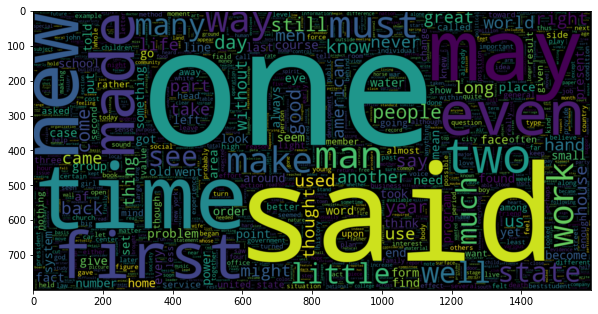

In [ ]:
# plot the word cloud for the Brown Corpus
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600, 
               height = 800).generate(" ".join(df[df.isBrown == 1].text_joined))
plt.imshow(wc, interpolation = 'bilinear')

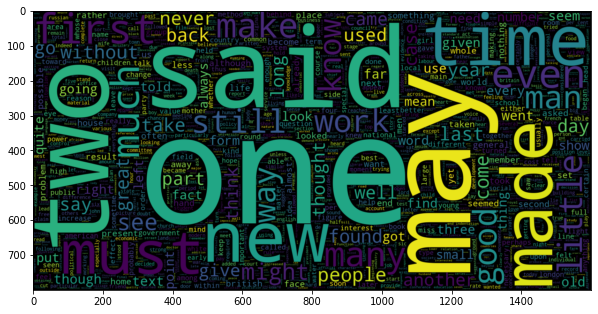

In [ ]:
# plot the word cloud for the LOB Corpus
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600, 
               height = 800).generate(" ".join(df[df.isBrown == 0].text_joined))
plt.imshow(wc, interpolation = 'bilinear')

# 2. The Model

## 2.1 Tokenization and Padding

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
# length of maximum document will be needed to create word embeddings 
maxlen = -1
for doc in df.text_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)



The maximum number of words in any document is = 12


In [ ]:
# split data into test and train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.text_joined, df.isBrown, test_size = 0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional

In [ ]:
# Create a tokenizer to create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [ ]:
# Example of tokenized text
print("The encoding for document\n",df.text_joined[100],"\n is : ",train_sequences[100])

The encoding for document
 represented sir roderick taken part detailed common market exchanges past 
 is :  [139, 1965, 387, 4900, 22403, 1211, 29223, 416, 83, 1616]


In [ ]:
padded_train = pad_sequences(train_sequences,maxlen = 12, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 12, truncating = 'post') 

In [ ]:
for i,doc in enumerate(padded_train[:3]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [  247   273 18505  5862 10591    98   273  1119  5863   561     0     0]
The padded encoding for document 2  is :  [ 1040   115 22381  1433  2092  9859    59  6362  5864  4473     0     0]
The padded encoding for document 3  is :  [ 7667  1866   553  9208   574 15946  2406    21  1195 29190     0     0]


## 2.2 Building and Training the Model

In [ ]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))

# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         6545920   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 6,842,113
Trainable params: 6,842,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
total_words

51140

In [ ]:
y_train = np.asarray(y_train)

In [ ]:
# train the model, substrings = 10
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 1)

1011/1011 [==============================] - 147s 141ms/step - loss: 0.5416 - acc: 0.7150 - val_loss: 0.4775 - val_acc: 0.7619


# 3. Assessing the Model Performance

In [ ]:
# make prediction
pred = model.predict(padded_test)

562/562 [==============================] - 10s 17ms/step


In [ ]:
# if the predicted value is >0.5 it is American (Brown), 
# else it is British (LOB)

prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.7585707925200356


In [ ]:
import seaborn as sns

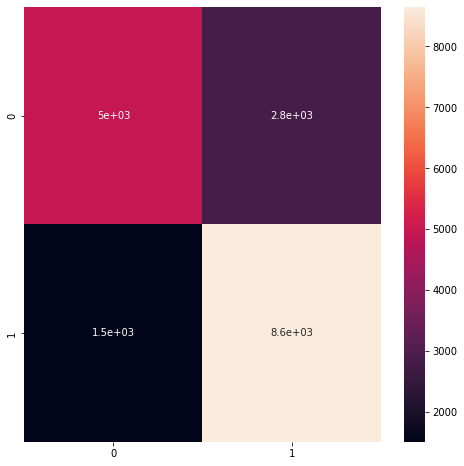

In [ ]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (8, 8))
sns.heatmap(cm, annot = True)

In [ ]:
# category dict
category = { 0: 'British', 1 : "American"}

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score 

precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.7534843205574913
Recall: 0.851545579838551
F1 score: 0.7995193640817082
